In [15]:
import sys
import os
from mpasanalysis import *
%matplotlib inline

In [16]:
# mesh_file = '/Users/qingli/data/mpas/test/super-parameterization/sp_mle/output.0000-01-01_00.00.00.nc'
mesh_file = '/Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy_BF00/output/output.0000-01-01_00.00.00.nc'
data_file = mesh_file
figdir = '/Users/qingli/work/superPrameterization/sp_mixed_layer_eddy'
os.makedirs(figdir, exist_ok=True)

In [19]:
mpas_data = MPASOData(filepath=data_file, filepath_mesh=mesh_file)

xtime = chartostring(mpas_data.load().variables['xtime'][:])
time = [x.strip() for x in xtime]
ntime = len(time)

In [4]:
def plot_hlines(yfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    ymin, ymax = axis.get_ylim()
    yf = ymin+yfrac*(ymax-ymin)
    plt.axhline(yf, **kwargs)
def plot_vlines(xfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    xmin, xmax = axis.get_xlim()
    xf = xmin+xfrac*(xmax-xmin)
    plt.axvline(xf, **kwargs)

In [20]:
def plot_snapshot(varname, tidx, zidx=0, name=None, units=None,
                  position='cell', levels=None, xfrac=None, yfrac=None,
                  savefig=False, figdir=None, **kwargs):
    data = mpas_data.get_domain(varname=varname, position=position, name=name, units=units, tidx=tidx)
    # get time
    time_str = time[tidx]
    print(time_str)
    # xy view
    fig_xy = plt.figure(figsize=[6,5])
    data.plot_xy(ptype='contourf', levels=levels, zidx=zidx, title=time_str, **kwargs)
    axis = plt.gca()
    if xfrac is not None:
        plot_vlines(xfrac, axis=axis, color='k')
    if yfrac is not None:
        plot_hlines(yfrac, axis=axis, color='k')
    plt.tight_layout()
    if savefig:
        assert figdir is not None, 'figdir required.'
        figname = figdir+'/'+varname+'_xy_{:04d}'.format(tidx)
        fig_xy.savefig(figname, dpi = 300)   

    # cross front mean
    fig_yzm = plt.figure(figsize=[6,3.5])
    data.plot_yz_mean(ptype='contourf', levels=levels, title=time_str, **kwargs)
    plt.tight_layout()
    if savefig:
        assert figdir is not None, 'figdir required.'
        figname = figdir+'/'+varname+'_yzm_{:04d}'.format(tidx)
        fig_yzm.savefig(figname, dpi = 300) 
        
    # cross front
    if xfrac is not None:
        fig_yz = plt.figure(figsize=[6,3.5])
        data.plot_yz(xfrac=xfrac, ptype='contourf', levels=levels, title=time_str, **kwargs)
#         plt.ylim([-80,0])
        plt.tight_layout()
        if savefig:
            assert figdir is not None, 'figdir required.'
            figname = figdir+'/'+varname+'_yz_{:04d}'.format(tidx)
            fig_yz.savefig(figname, dpi = 300)   
    # along front
    if yfrac is not None:
        fig_xz = plt.figure(figsize=[6,3.5])
        data.plot_xz(yfrac=yfrac, ptype='contourf', levels=levels, title=time_str, **kwargs)
#         plt.ylim([-80,0])
        plt.tight_layout()
        if savefig:
            assert figdir is not None, 'figdir required.'
            figname = figdir+'/'+varname+'_xz_{:04d}'.format(tidx)
            fig_xz.savefig(figname, dpi = 300)   
    

## Snapshot 

### Temperature 

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy_BF00/output/output.0000-01-01_00.00.00.nc
0000-01-01_03:00:00
Average over x at 109 bins in y.
Nearest neighbor interpolation to 109 points.
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy_BF00/output/output.0000-01-01_00.00.00.nc
0000-01-01_06:00:00
Average over x at 109 bins in y.
Nearest neighbor interpolation to 109 points.
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy_BF00/output/output.0000-01-01_00.00.00.nc
0000-01-01_09:00:00
Average over x at 109 bins in y.
Nearest neighbor interpolation to 109 points.
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy_BF00/output/output.0000-01-01_00.00.00.nc
0000-01-01_12:00:00
Average over x at 109 bins in y.
Nearest neighbor interpolation to 109 points.
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy_B

KeyboardInterrupt: 

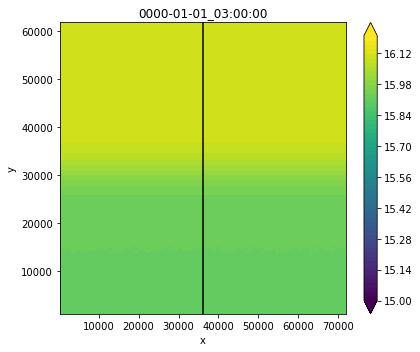

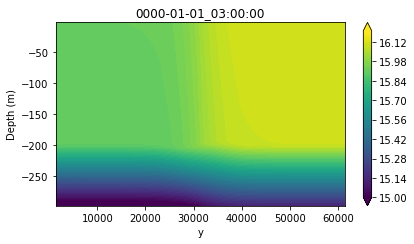

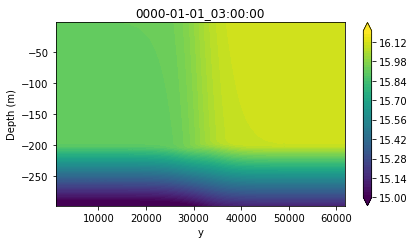

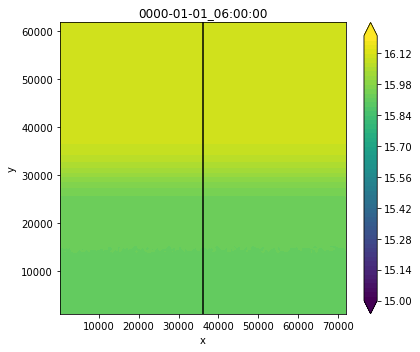

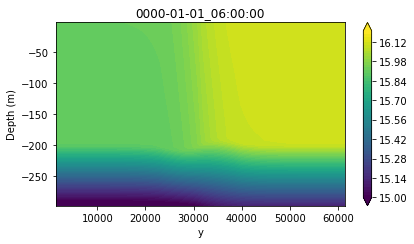

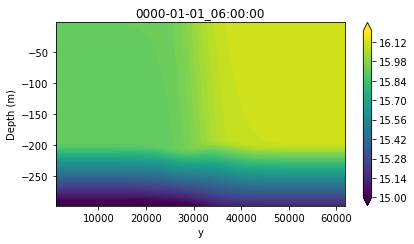

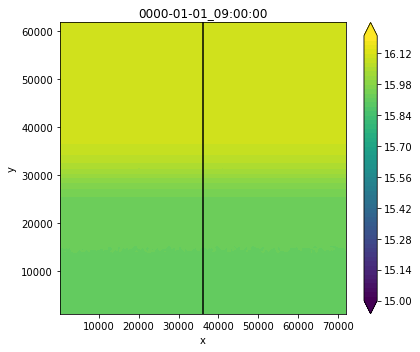

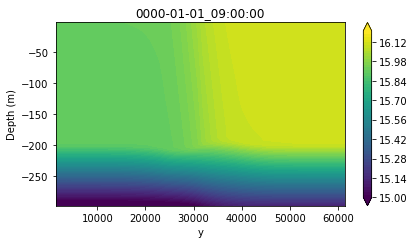

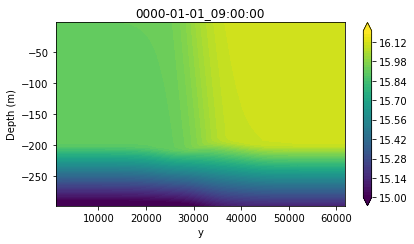

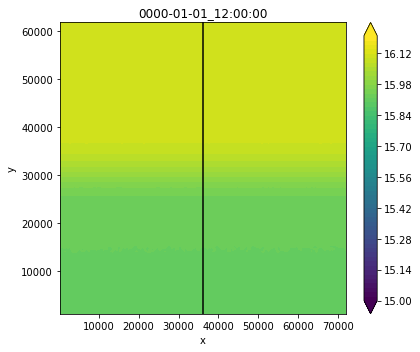

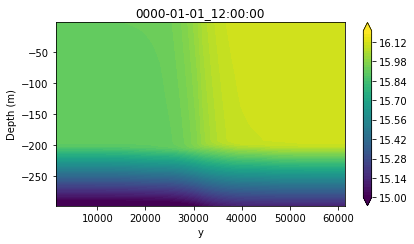

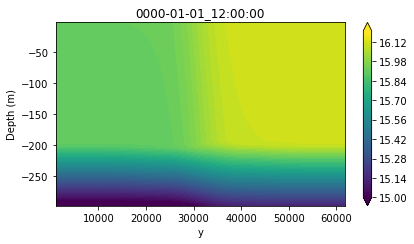

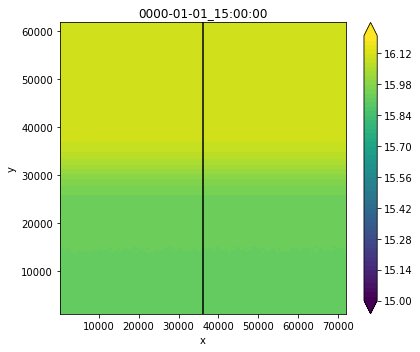

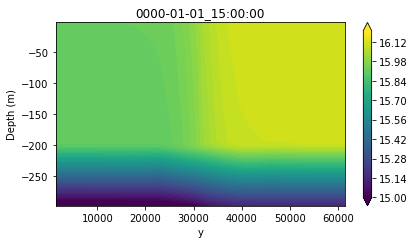

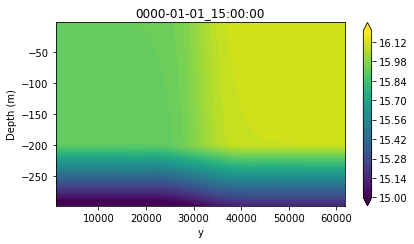

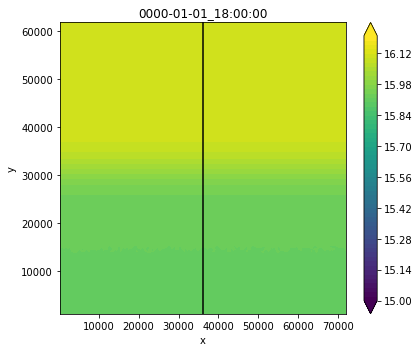

<Figure size 432x252 with 0 Axes>

In [21]:
levels=np.linspace(15,16.2,61)
for tidx in np.arange(ntime):
    plot_snapshot(varname='temperature', position='cell', name='temperature', units='degC',
                  levels=levels, tidx=tidx, xfrac=0.5, savefig=False, figdir=figdir)

    ### Relative vorticity

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-01_03:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-01_06:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-01_09:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-01_12:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-01_15:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-01_18:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-0

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-08_06:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-08_09:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-08_12:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-08_15:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-08_18:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-08_21:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-0

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-15_09:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-15_12:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-15_15:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-15_18:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-15_21:00:00 
Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-16_00:00:00 


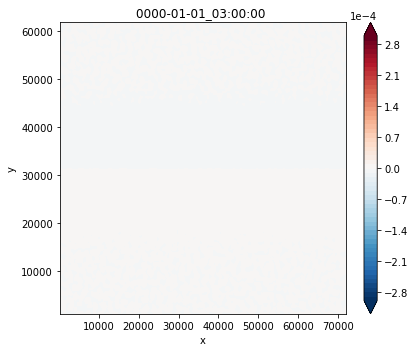

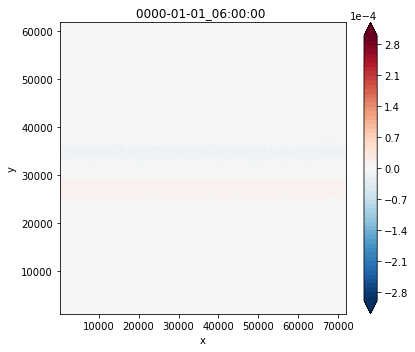

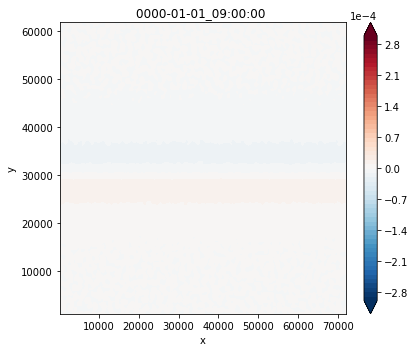

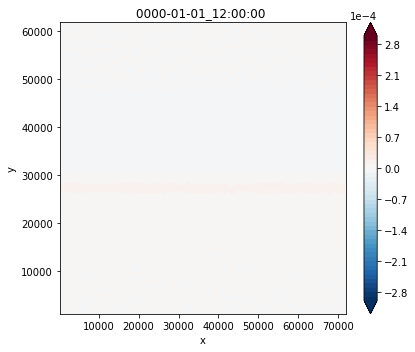

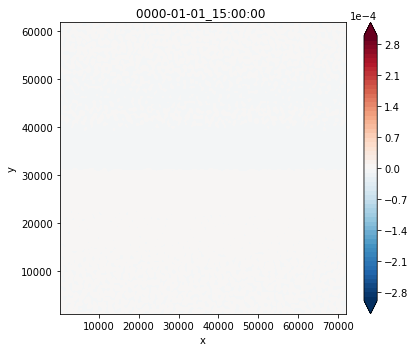

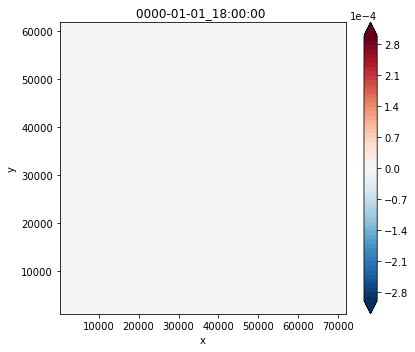

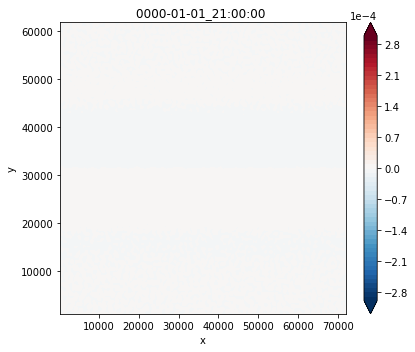

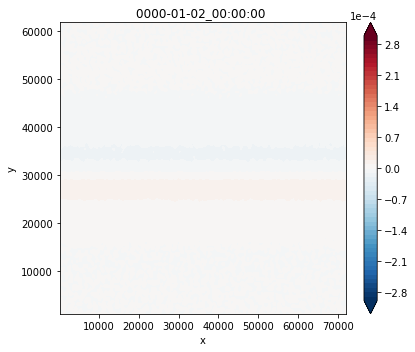

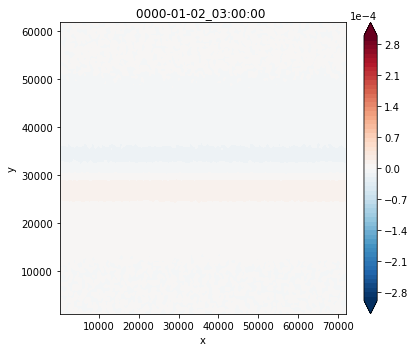

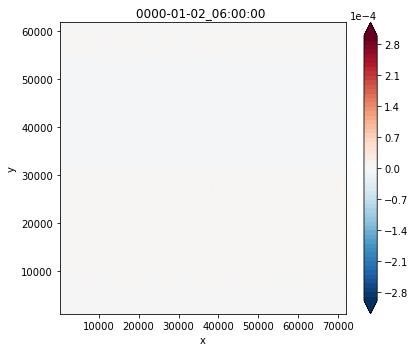

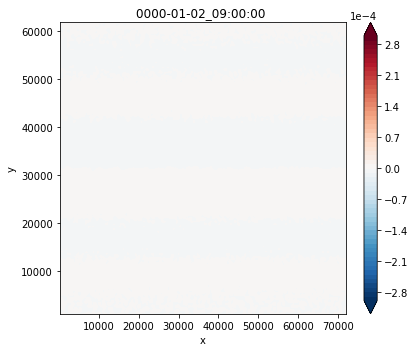

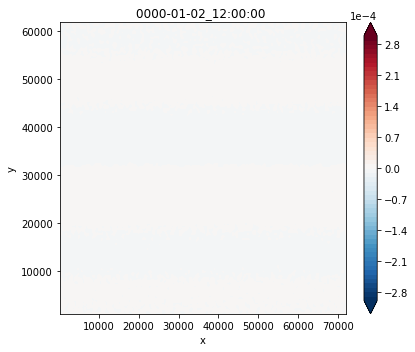

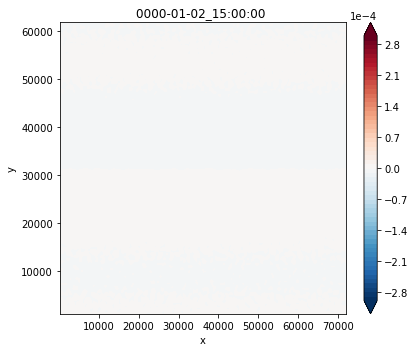

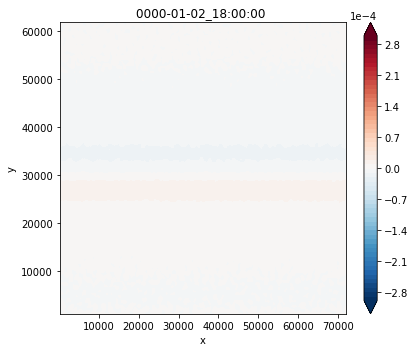

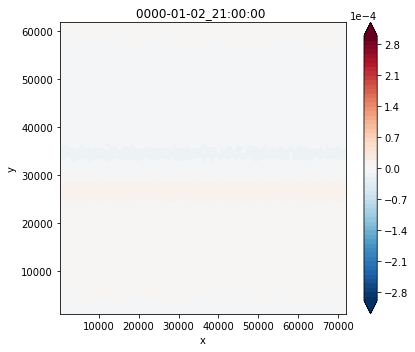

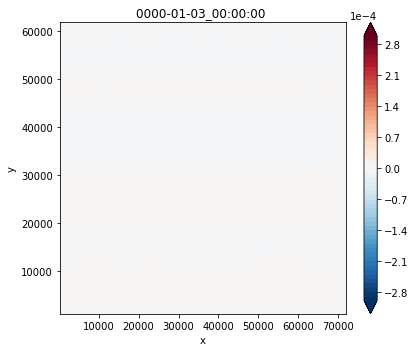

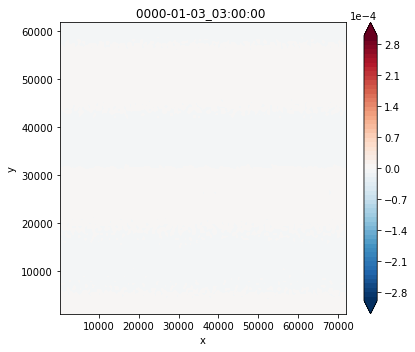

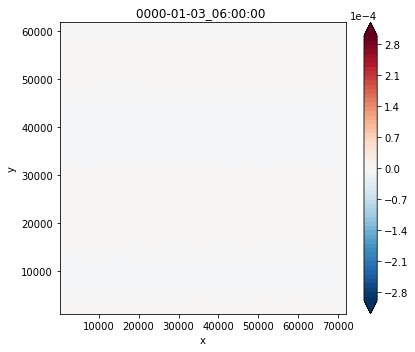

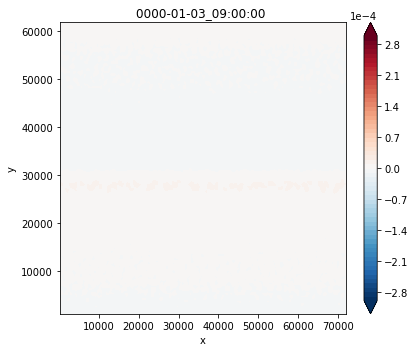

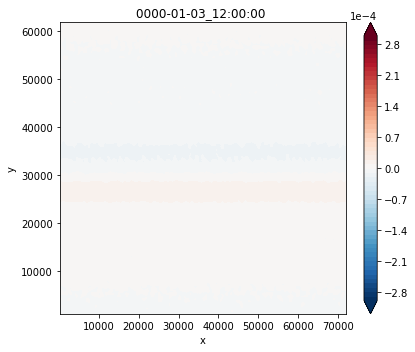

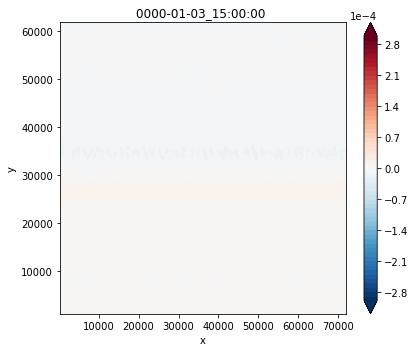

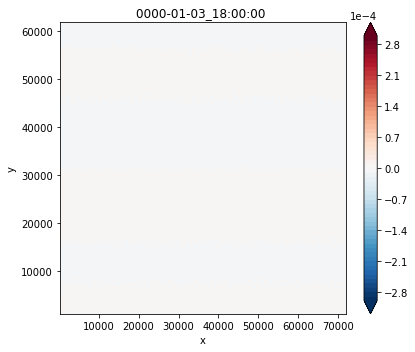

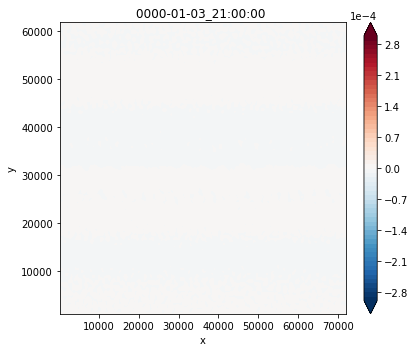

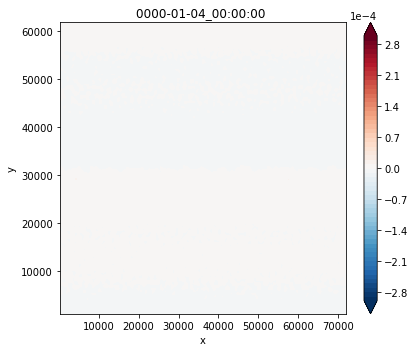

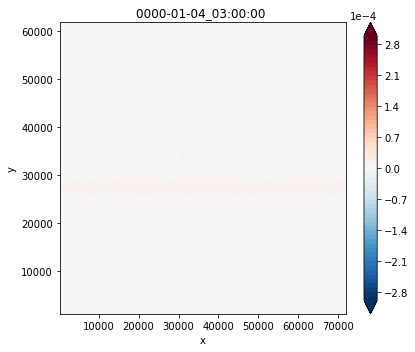

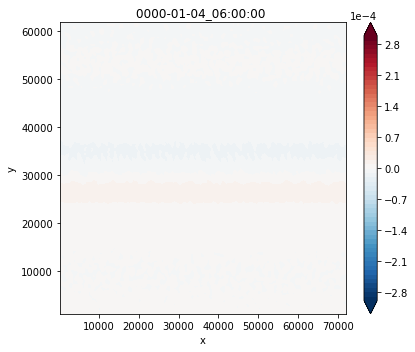

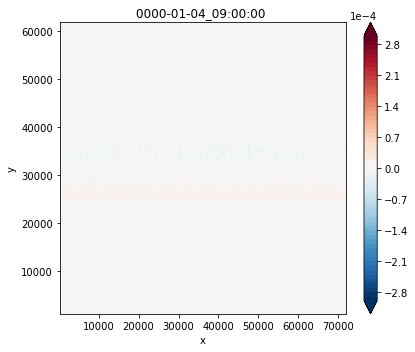

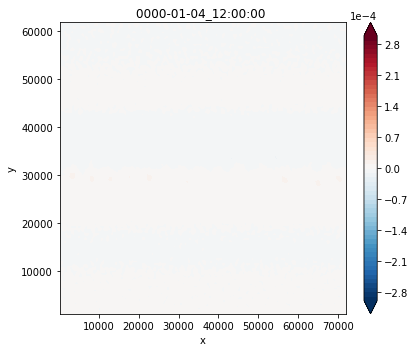

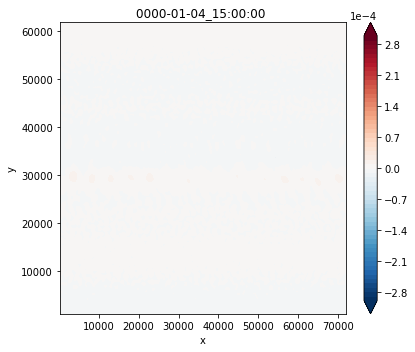

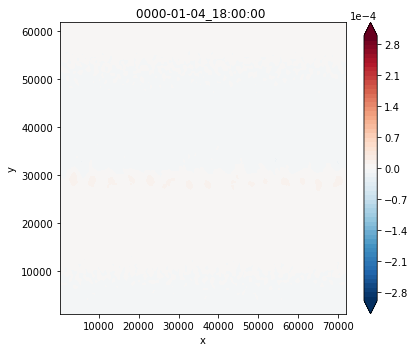

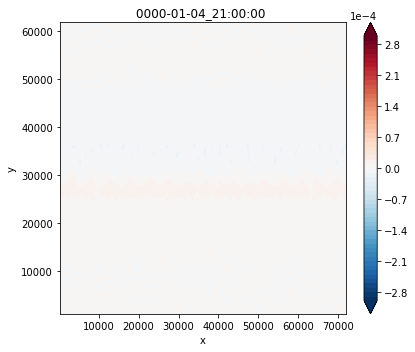

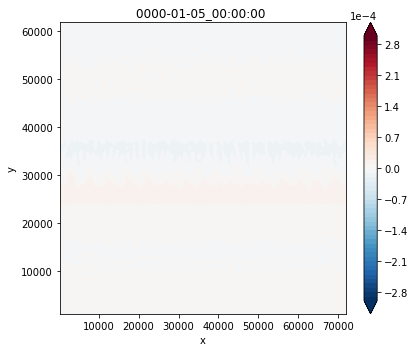

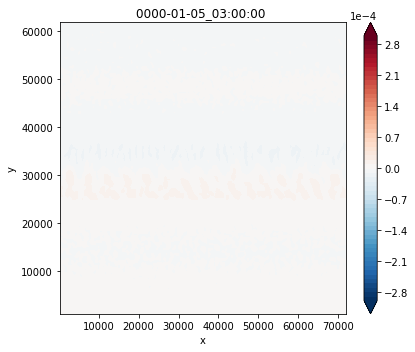

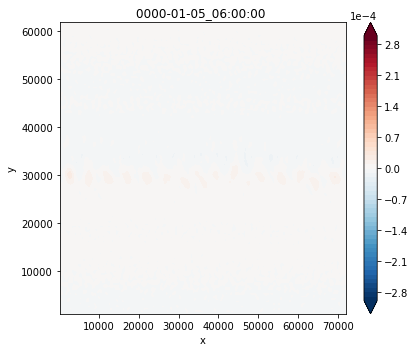

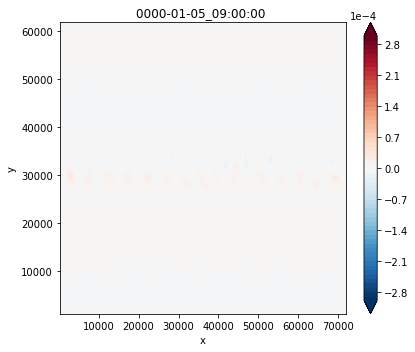

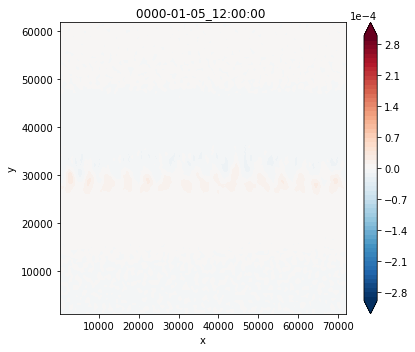

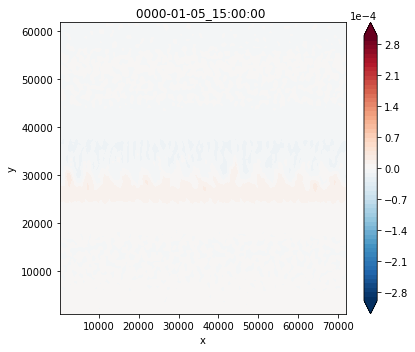

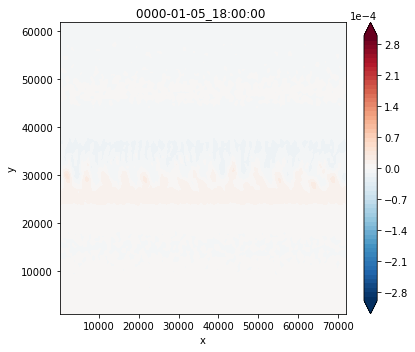

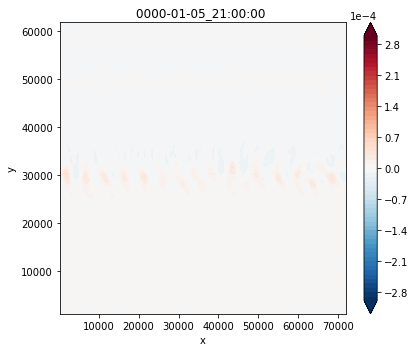

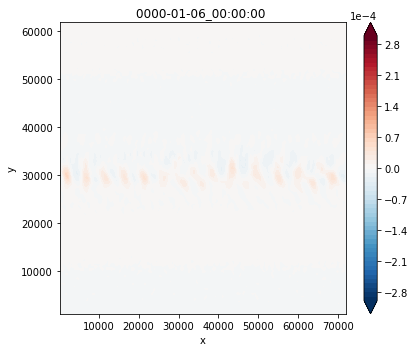

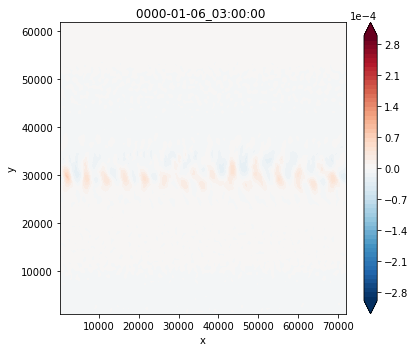

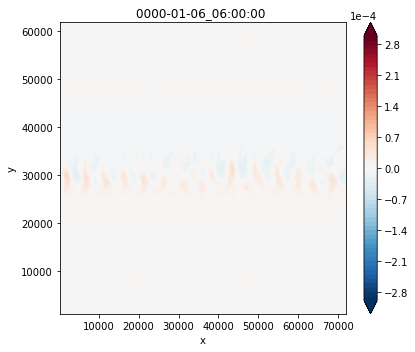

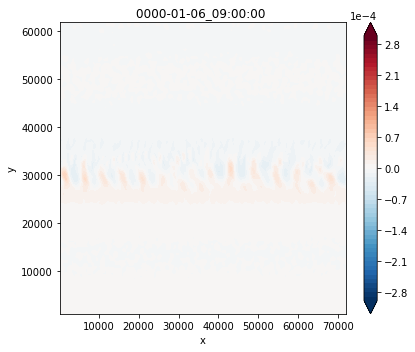

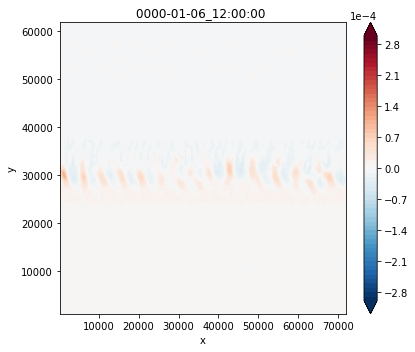

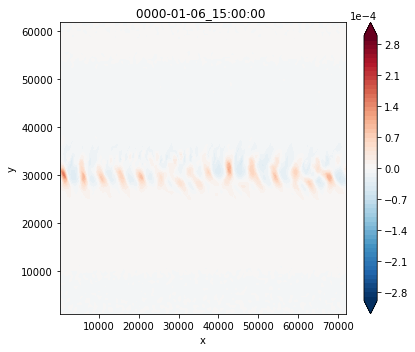

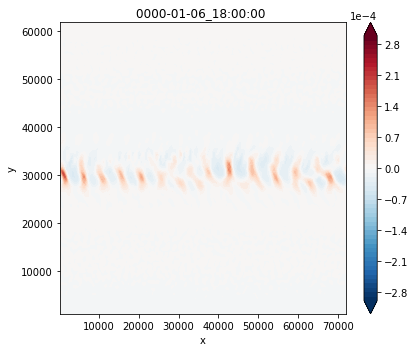

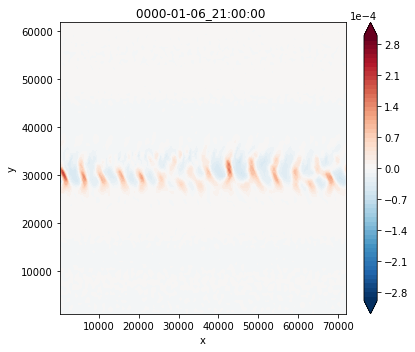

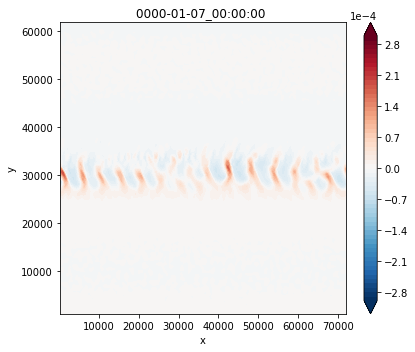

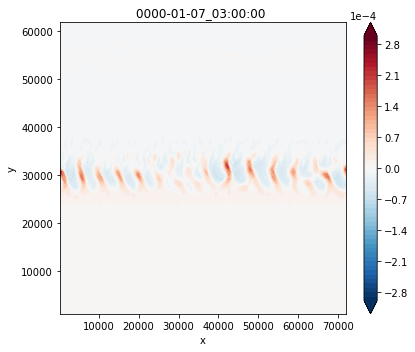

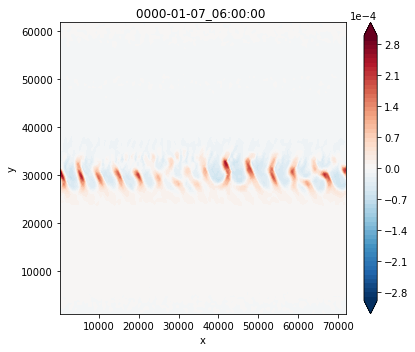

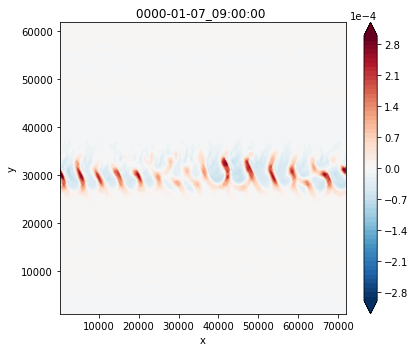

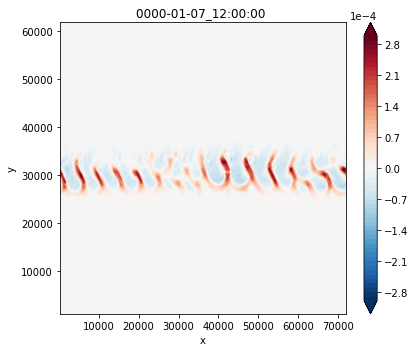

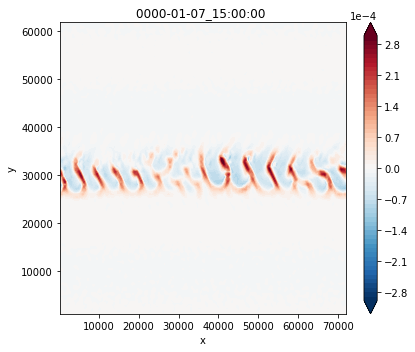

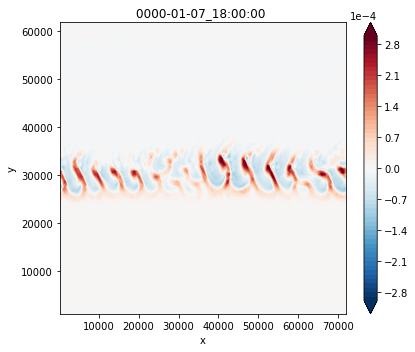

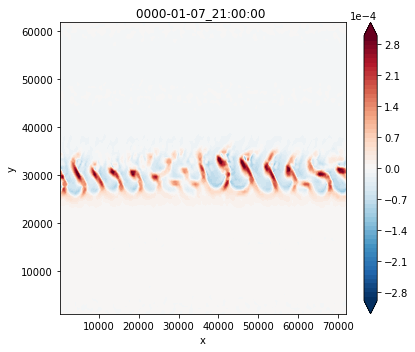

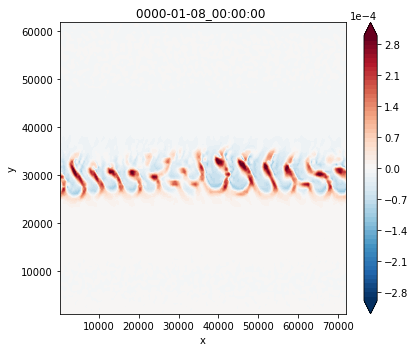

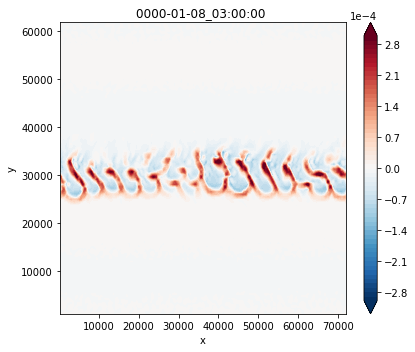

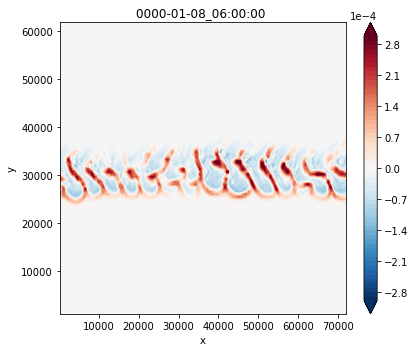

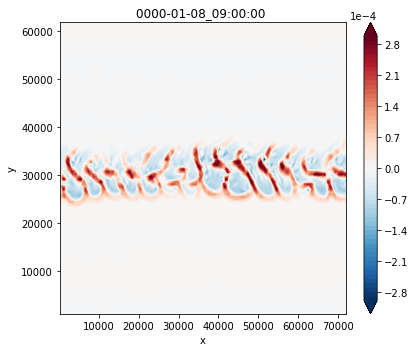

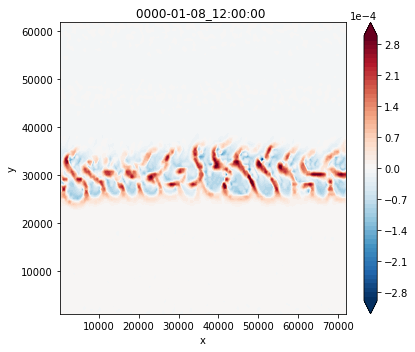

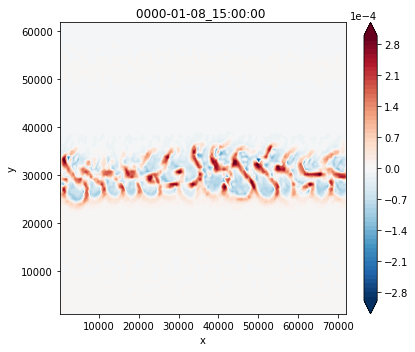

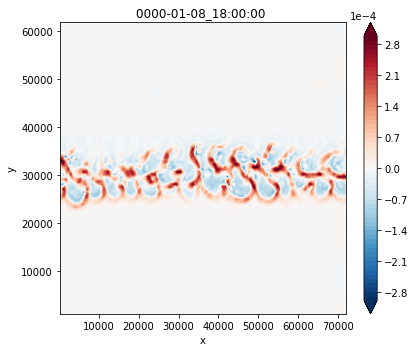

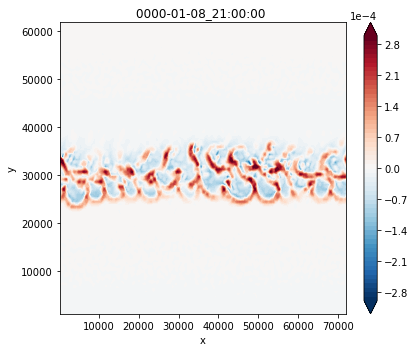

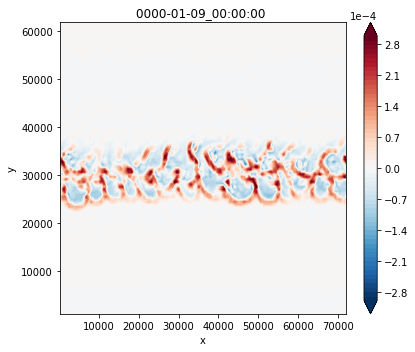

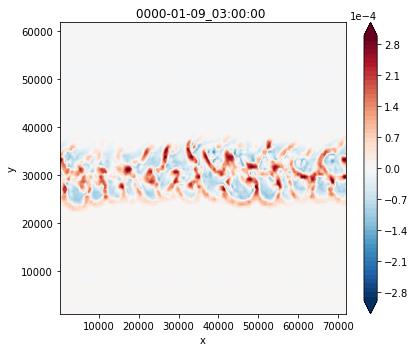

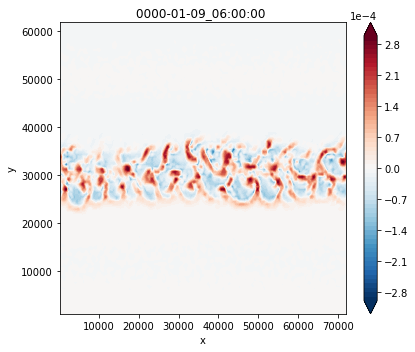

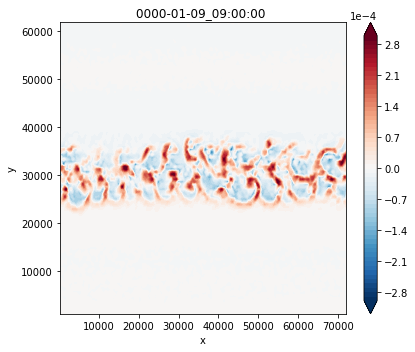

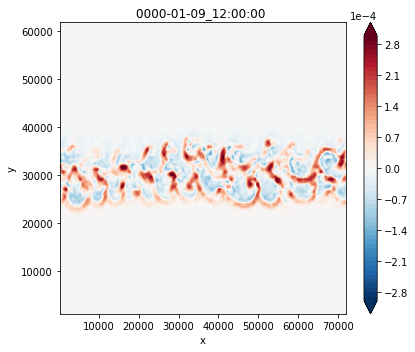

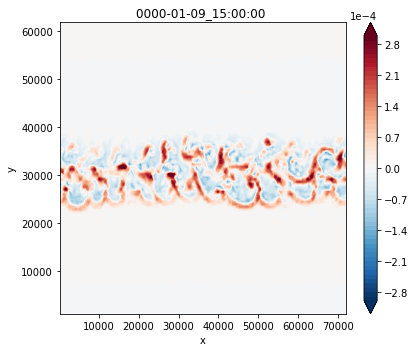

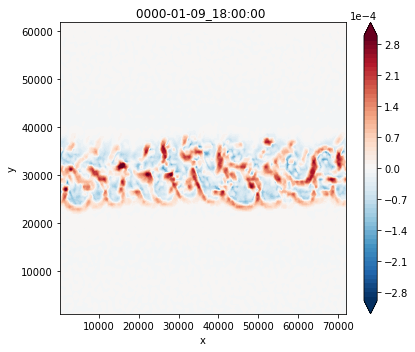

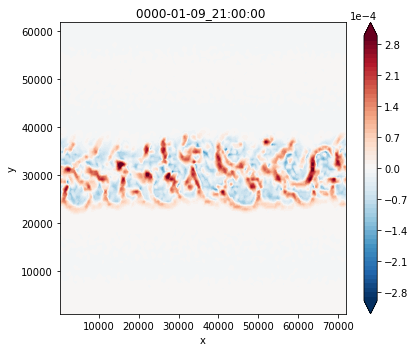

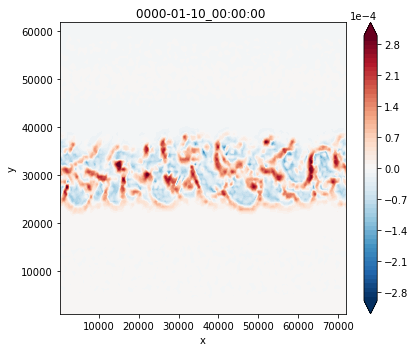

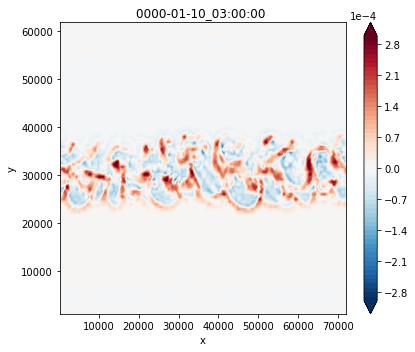

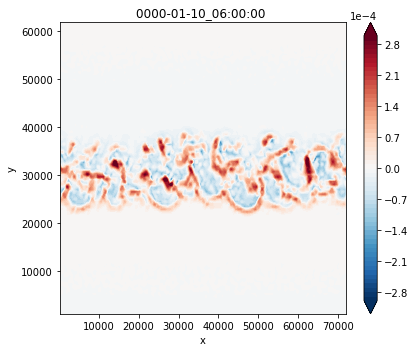

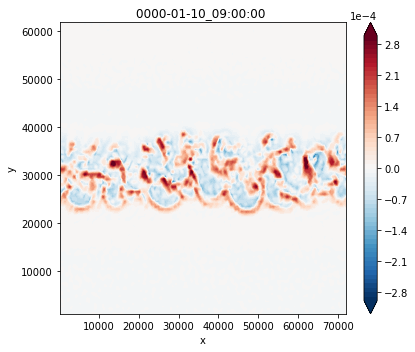

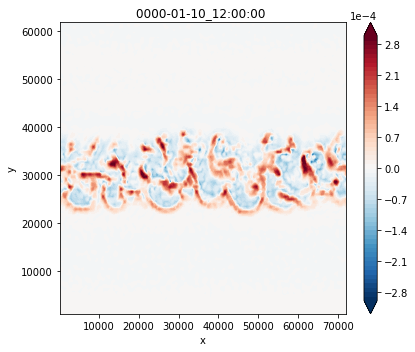

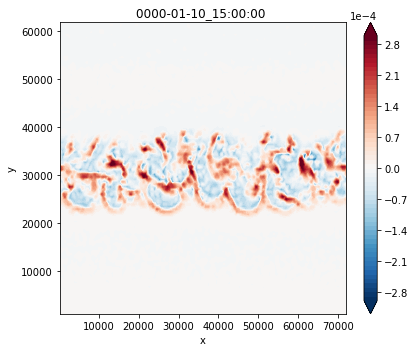

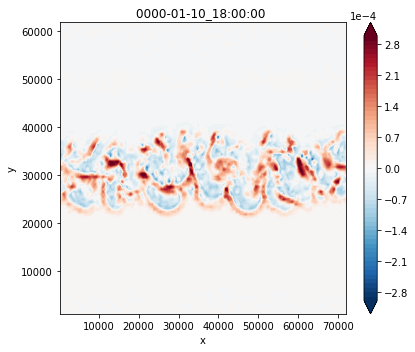

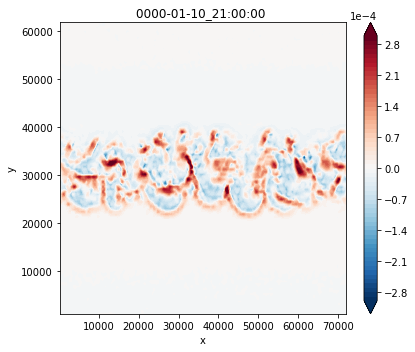

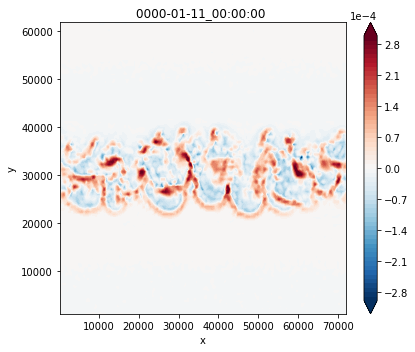

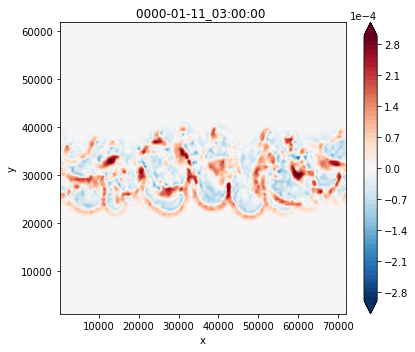

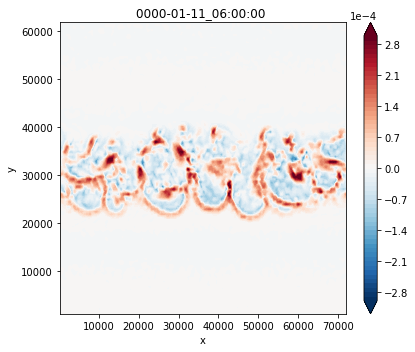

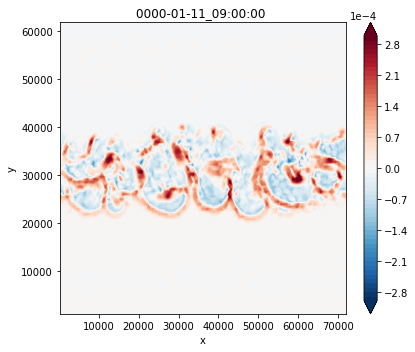

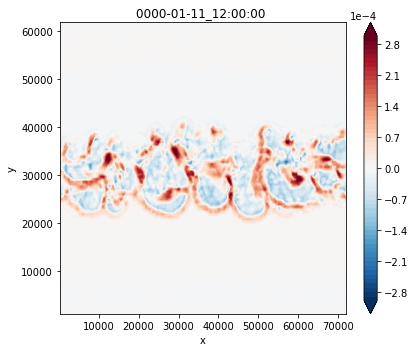

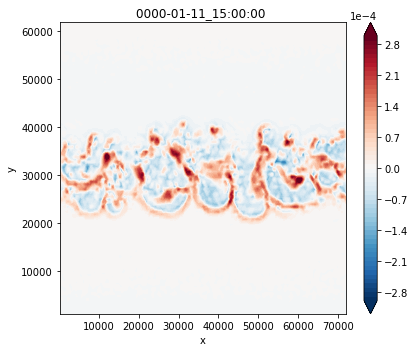

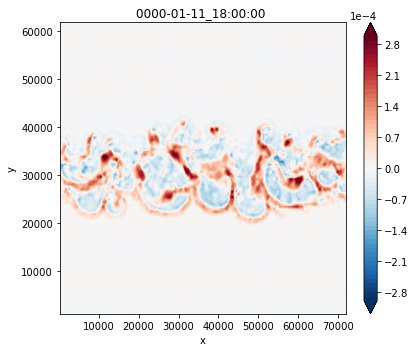

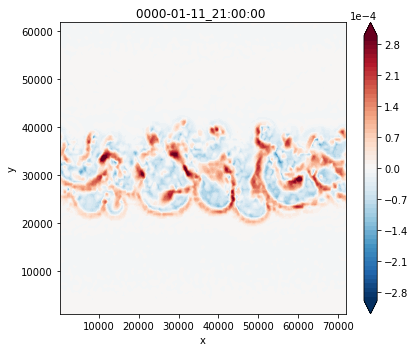

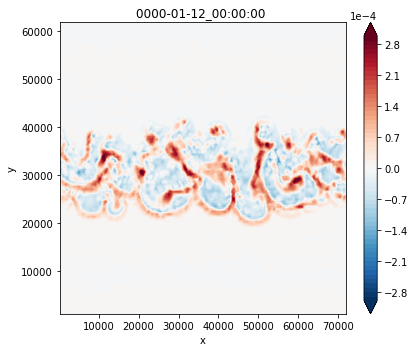

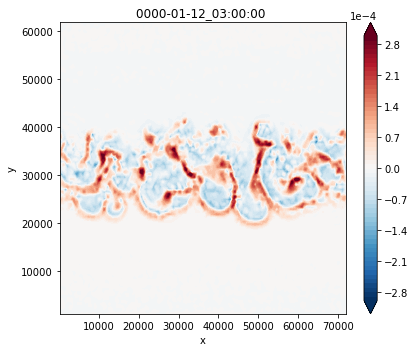

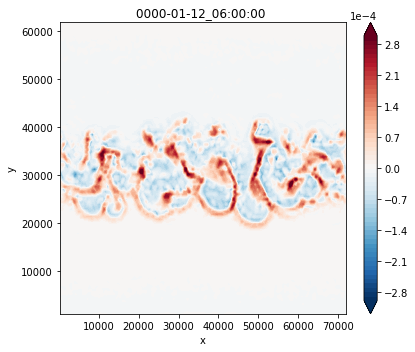

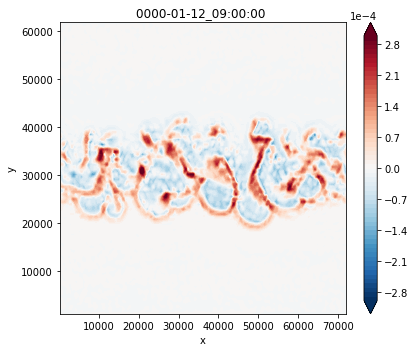

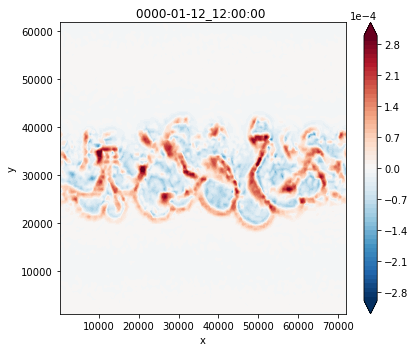

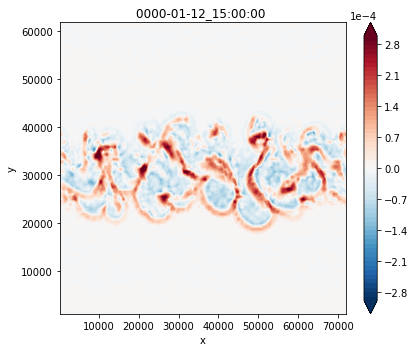

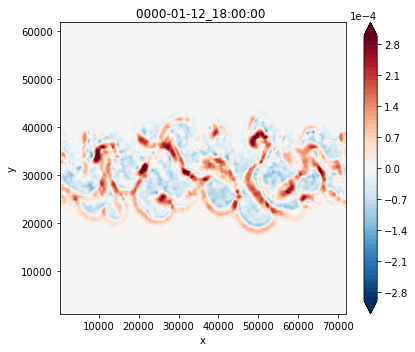

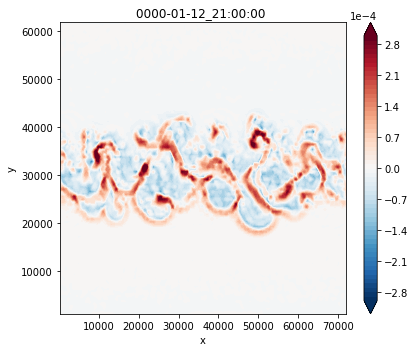

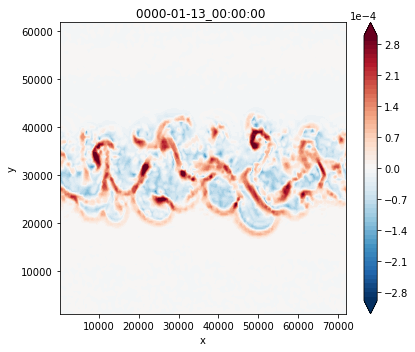

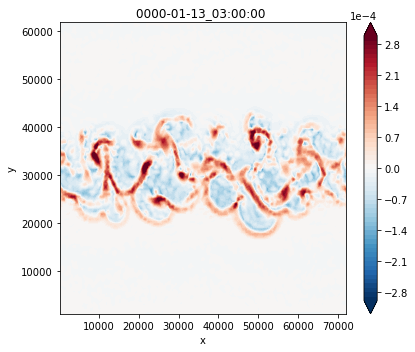

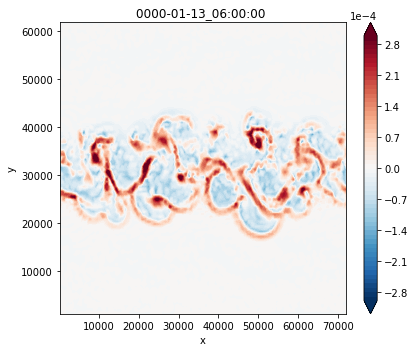

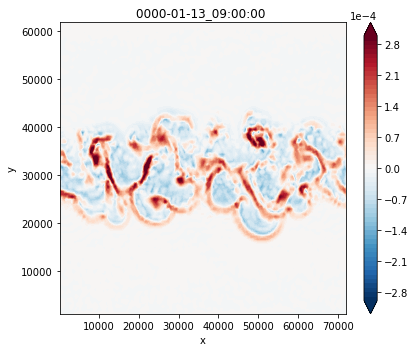

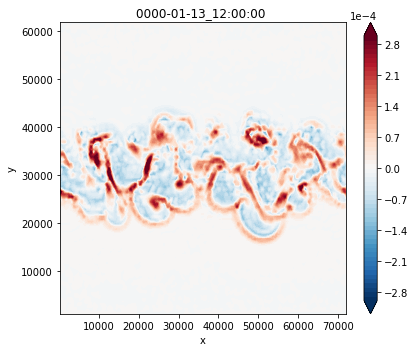

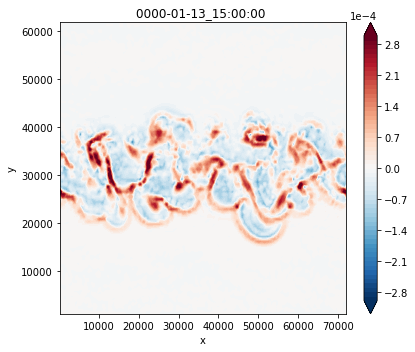

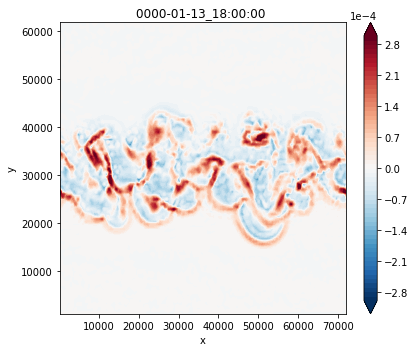

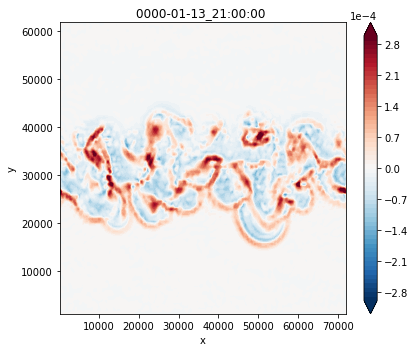

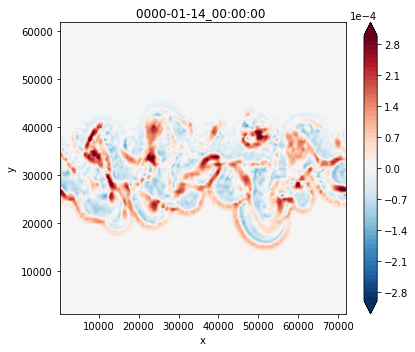

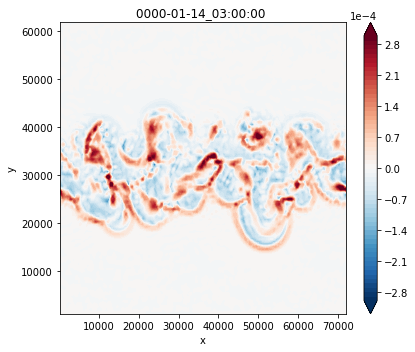

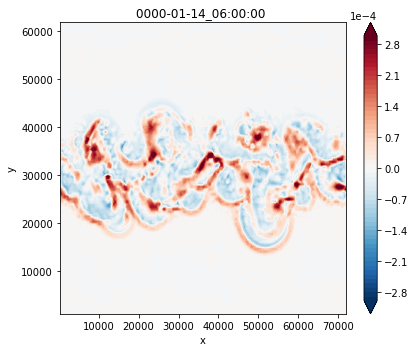

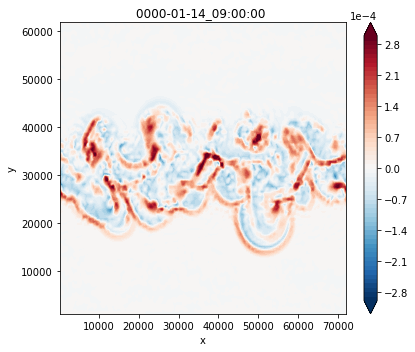

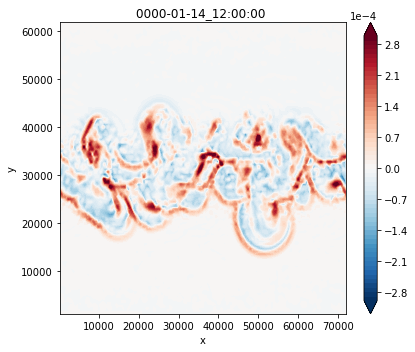

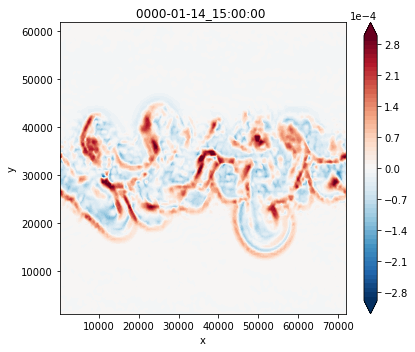

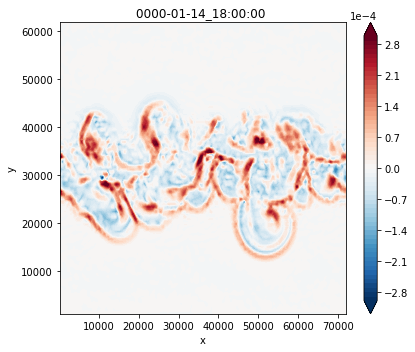

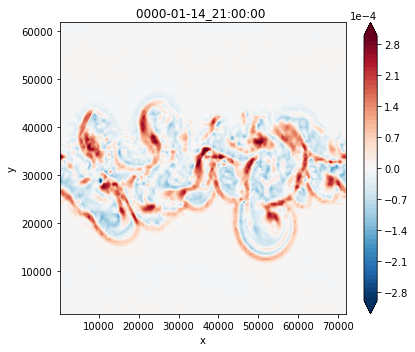

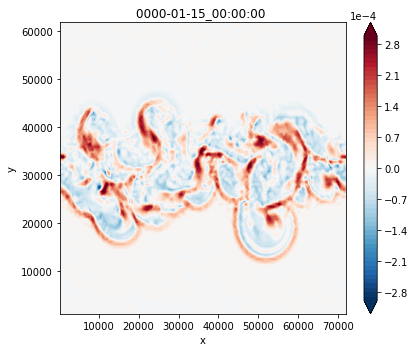

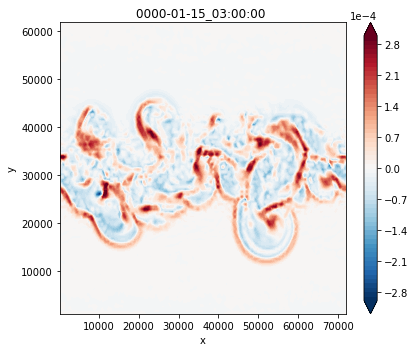

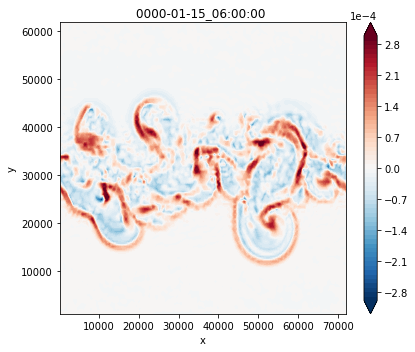

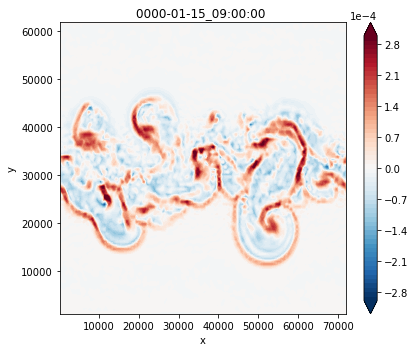

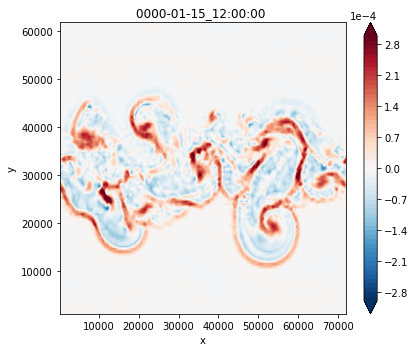

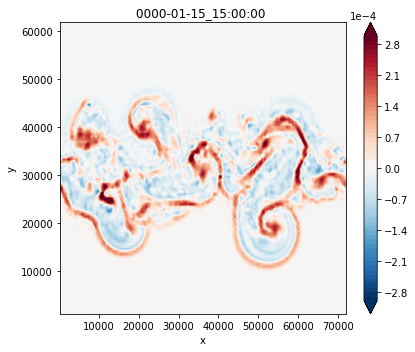

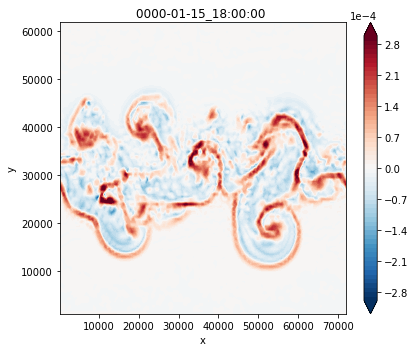

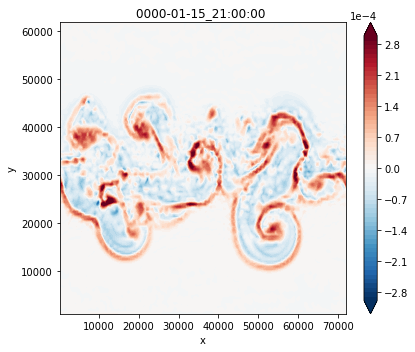

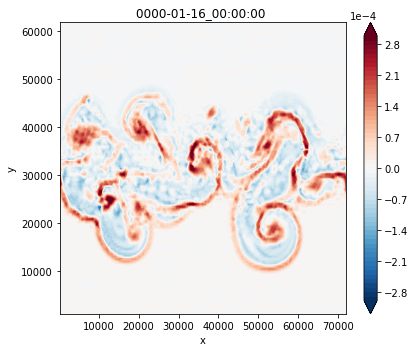

In [12]:
levels=np.linspace(-3e-4,3e-4,61)
for tidx in np.arange(ntime):
    plot_snapshot(varname='relativeVorticityCell', position='cell', name='relative vorticity', units='1/s',
                  levels=levels, tidx=tidx, cmap='RdBu_r', savefig=True, figdir=figdir)

### Kinetic energy 

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
0000-01-16_00:00:00 
Nearest neighbor interpolation to 109 points.
Nearest neighbor interpolation to 129 points.


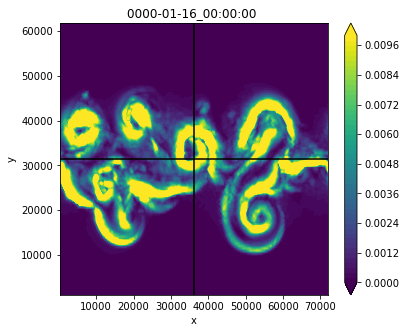

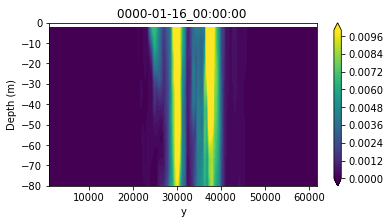

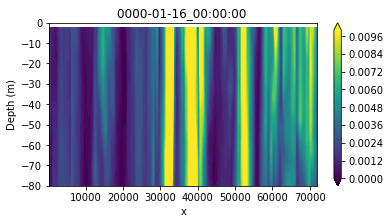

In [9]:
levels=np.linspace(0,1e-2,51)
plot_snapshot(varname='kineticEnergyCell', position='cell', name='KE', units='m^2 s^{-2}',
              levels=levels, tidx=tidx, xfrac=xfrac, yfrac=yfrac)